In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-thinks-personality-traits-from-selfies/ai_personality_selfie_dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
# If only plt is used, switch its backend
plt.switch_backend('Agg')

import seaborn as sns

# Ensure inline plotting
%matplotlib inline

# Set plot style for aesthetics
sns.set(style='whitegrid')

In [3]:
df = '/kaggle/input/ai-thinks-personality-traits-from-selfies/ai_personality_selfie_dataset.csv'

In [8]:
print(df[:5])


data.


In [10]:
# Load the dataset
df = pd.read_csv("/kaggle/input/ai-thinks-personality-traits-from-selfies/ai_personality_selfie_dataset.csv")

In [11]:
df.head()

,image_id,user_selfie,extroversion_score,confidence_level,trustworthiness_score,smile_intensity,eye_contact_score,model_used,age_range,gender,emotion_category
0,img_000.jpg,https://syntheticfaces.ai/img_000.jpg,0.62,0.60,0.56,0.52,0.41,CLIP-ViT-B/32 + GPT-4V,25-34,Other,Neutral
1,img_001.jpg,https://syntheticfaces.ai/img_001.jpg,0.25,0.58,0.74,0.10,0.15,CLIP-ViT-B/32 + GPT-4V,18-24,Female,Surprised
2,img_002.jpg,https://syntheticfaces.ai/img_002.jpg,0.33,0.27,0.14,0.86,0.48,CLIP-ViT-B/32 + GPT-4V,45-54,Male,Surprised
3,img_003.jpg,https://syntheticfaces.ai/img_003.jpg,0.33,0.75,0.35,0.24,0.15,CLIP-ViT-B/32 + GPT-4V,18-24,Non-binary,Angry
4,img_004.jpg,https://syntheticfaces.ai/img_004.jpg,0.41,0.14,0.91,0.45,0.33,CLIP-ViT-B/32 + GPT-4V,25-34,Female,Neutral


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               20 non-null     object 
 1   user_selfie            20 non-null     object 
 2   extroversion_score     20 non-null     float64
 3   confidence_level       20 non-null     float64
 4   trustworthiness_score  20 non-null     float64
 5   smile_intensity        20 non-null     float64
 6   eye_contact_score      20 non-null     float64
 7   model_used             20 non-null     object 
 8   age_range              20 non-null     object 
 9   gender                 20 non-null     object 
 10  emotion_category       20 non-null     object 
dtypes: float64(5), object(6)
memory usage: 1.8+ KB


In [13]:
df.tail()

,image_id,user_selfie,extroversion_score,confidence_level,trustworthiness_score,smile_intensity,eye_contact_score,model_used,age_range,gender,emotion_category
15,img_015.jpg,https://syntheticfaces.ai/img_015.jpg,0.27,0.38,0.89,0.20,0.11,CLIP-ViT-B/32 + GPT-4V,35-44,Non-binary,Happy
16,img_016.jpg,https://syntheticfaces.ai/img_016.jpg,0.54,0.50,0.96,0.89,0.66,CLIP-ViT-B/32 + GPT-4V,35-44,Non-binary,Neutral
17,img_017.jpg,https://syntheticfaces.ai/img_017.jpg,0.53,0.85,0.09,0.69,0.32,CLIP-ViT-B/32 + GPT-4V,35-44,Male,Sad
18,img_018.jpg,https://syntheticfaces.ai/img_018.jpg,0.89,0.31,0.94,0.34,0.65,CLIP-ViT-B/32 + GPT-4V,25-34,Other,Happy
19,img_019.jpg,https://syntheticfaces.ai/img_019.jpg,0.78,0.82,0.87,0.99,0.85,CLIP-ViT-B/32 + GPT-4V,55+,Female,Neutral


In [14]:
import pandas as pd

# Φόρτωση
data_path = '/kaggle/input/ai-thinks-personality-traits-from-selfies/ai_personality_selfie_dataset.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Βασική πληροφόρηση
print("Shape:", df.shape)
print(df.dtypes)
print(df.isnull().sum())


Shape: (20, 11)
image_id                  object
user_selfie               object
extroversion_score       float64
confidence_level         float64
trustworthiness_score    float64
smile_intensity          float64
eye_contact_score        float64
model_used                object
age_range                 object
gender                    object
emotion_category          object
dtype: object
image_id                 0
user_selfie              0
extroversion_score       0
confidence_level         0
trustworthiness_score    0
smile_intensity          0
eye_contact_score        0
model_used               0
age_range                0
gender                   0
emotion_category         0
dtype: int64


In [15]:
# Περιγραφικά στατιστικά μόνο για τα αριθμητικά
print(df.describe())


       extroversion_score  confidence_level  trustworthiness_score  \
count           20.000000         20.000000               20.00000   
mean             0.465000          0.517000                0.54200   
std              0.266784          0.292181                0.29545   
min              0.060000          0.040000                0.09000   
25%              0.265000          0.267500                0.30750   
50%              0.370000          0.540000                0.50500   
75%              0.630000          0.767500                0.81000   
max              0.990000          0.960000                0.96000   

       smile_intensity  eye_contact_score  
count        20.000000          20.000000  
mean          0.501000           0.427000  
std           0.297373           0.270421  
min           0.090000           0.040000  
25%           0.230000           0.205000  
50%           0.540000           0.330000  
75%           0.742500           0.652500  
max           0.9

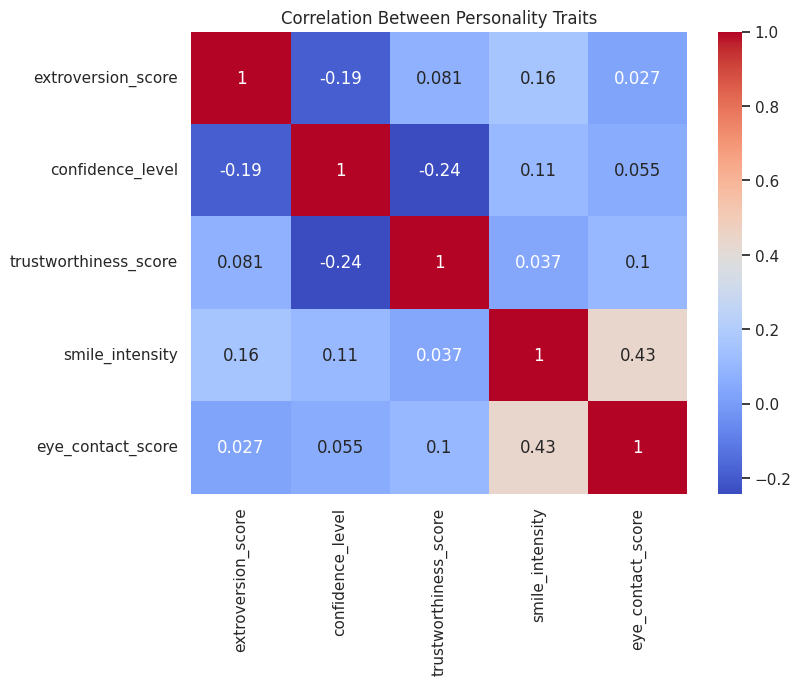

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['extroversion_score', 'confidence_level', 'trustworthiness_score', 'smile_intensity', 'eye_contact_score']
corr = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Personality Traits')
plt.show()


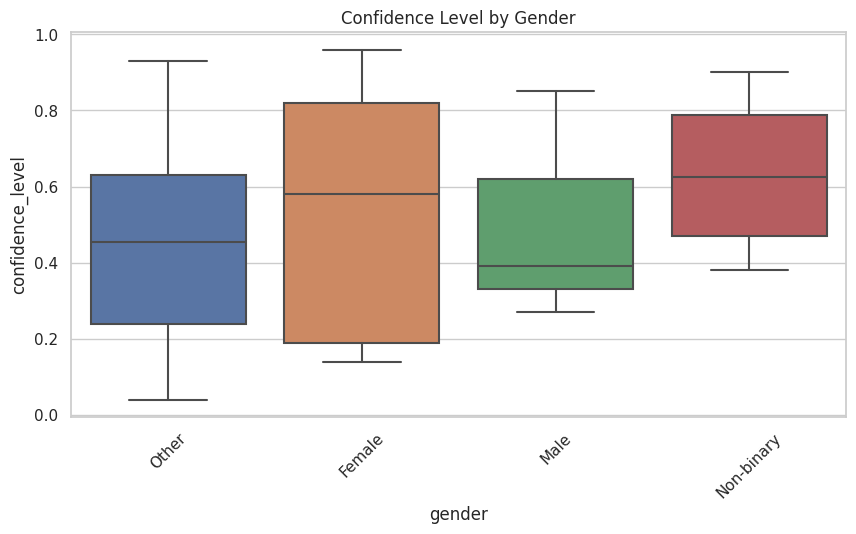

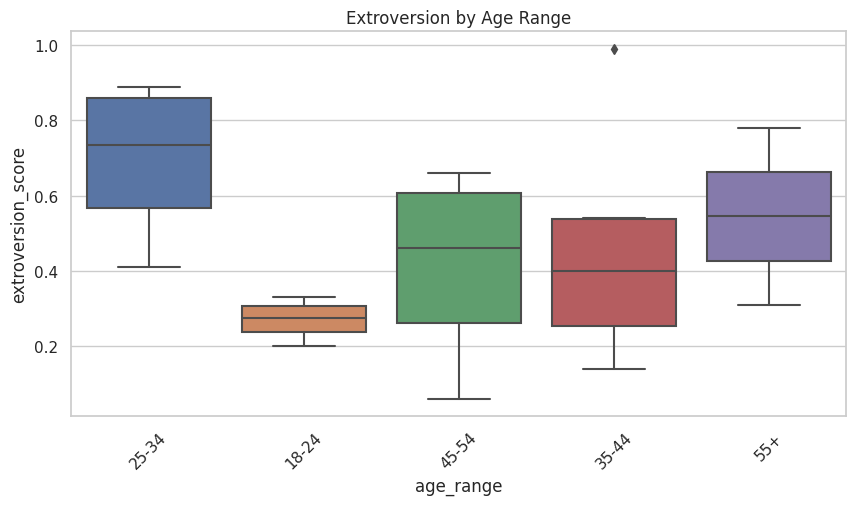

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='confidence_level', data=df)
plt.title('Confidence Level by Gender')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='age_range', y='extroversion_score', data=df)
plt.title('Extroversion by Age Range')
plt.xticks(rotation=45)
plt.show()


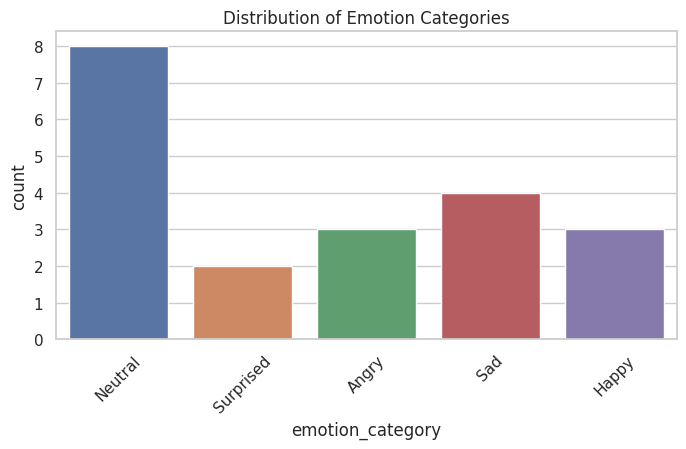

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='emotion_category', data=df)
plt.title('Distribution of Emotion Categories')
plt.xticks(rotation=45)
plt.show()


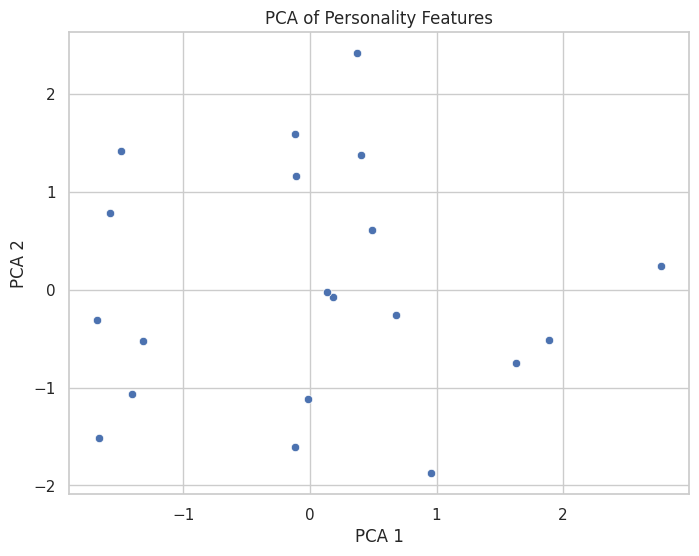

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df[cols].dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title('PCA of Personality Features')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


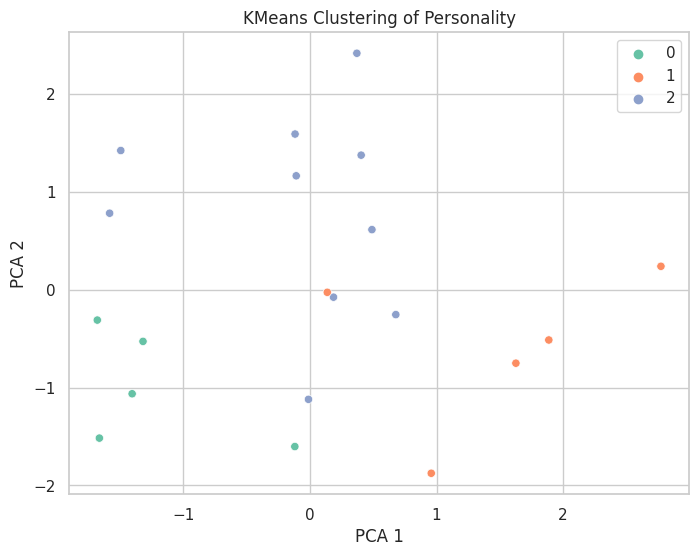

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
plt.title('KMeans Clustering of Personality')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Drop rows with NaNs and convert emotion_category to labels
df_clean = df.dropna(subset=cols + ['emotion_category'])
X = df_clean[cols]
y = df_clean['emotion_category']

# Encode emotions
y_encoded = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.12      0.25      0.17         4
weighted avg       0.12      0.25      0.17         4



In [22]:
import pandas as pd

data_path = '/kaggle/input/ai-thinks-personality-traits-from-selfies/ai_personality_selfie_dataset.csv'
df = pd.read_csv(data_path, encoding='ascii')

# Εμφάνιση βασικής πληροφορίας
print("🔢 Σχήμα:", df.shape)
print("🧠 Τύποι μεταβλητών:\n", df.dtypes)
print("❓ Null values:\n", df.isnull().sum())


🔢 Σχήμα: (20, 11)
🧠 Τύποι μεταβλητών:
 image_id                  object
user_selfie               object
extroversion_score       float64
confidence_level         float64
trustworthiness_score    float64
smile_intensity          float64
eye_contact_score        float64
model_used                object
age_range                 object
gender                    object
emotion_category          object
dtype: object
❓ Null values:
 image_id                 0
user_selfie              0
extroversion_score       0
confidence_level         0
trustworthiness_score    0
smile_intensity          0
eye_contact_score        0
model_used               0
age_range                0
gender                   0
emotion_category         0
dtype: int64


In [23]:
print("📊 Κατηγορίες στο φύλο:", df['gender'].unique())
print("📊 Κατηγορίες στην ηλικία:", df['age_range'].unique())
print("📊 Κατηγορίες συναισθημάτων:", df['emotion_category'].unique())


📊 Κατηγορίες στο φύλο: ['Other' 'Female' 'Male' 'Non-binary']
📊 Κατηγορίες στην ηλικία: ['25-34' '18-24' '45-54' '35-44' '55+']
📊 Κατηγορίες συναισθημάτων: ['Neutral' 'Surprised' 'Angry' 'Sad' 'Happy']


In [24]:
df['gender'] = df['gender'].fillna('Unknown')
df['age_range'] = df['age_range'].fillna('Unknown')
df = df.dropna(subset=[
    'extroversion_score', 'confidence_level',
    'trustworthiness_score', 'smile_intensity', 'eye_contact_score'
])


In [25]:
duplicates = df.duplicated()
print(f"🔁 Διπλότυπες γραμμές: {duplicates.sum()}")


🔁 Διπλότυπες γραμμές: 0


In [26]:
# Επιλογή μόνο των αριθμητικών στηλών
numeric_cols = [
    'extroversion_score', 'confidence_level', 
    'trustworthiness_score', 'smile_intensity', 'eye_contact_score'
]

# Υπολογισμός συσχέτισης Pearson
corr_matrix = df[numeric_cols].corr()

# Εμφάνιση της συσχέτισης
print(corr_matrix)


                       extroversion_score  confidence_level  \
extroversion_score               1.000000         -0.190475   
confidence_level                -0.190475          1.000000   
trustworthiness_score            0.081130         -0.241426   
smile_intensity                  0.157428          0.110949   
eye_contact_score                0.026701          0.054835   

                       trustworthiness_score  smile_intensity  \
extroversion_score                  0.081130         0.157428   
confidence_level                   -0.241426         0.110949   
trustworthiness_score               1.000000         0.036937   
smile_intensity                     0.036937         1.000000   
eye_contact_score                   0.104491         0.434361   

                       eye_contact_score  
extroversion_score              0.026701  
confidence_level                0.054835  
trustworthiness_score           0.104491  
smile_intensity                 0.434361  
eye_contact_sco

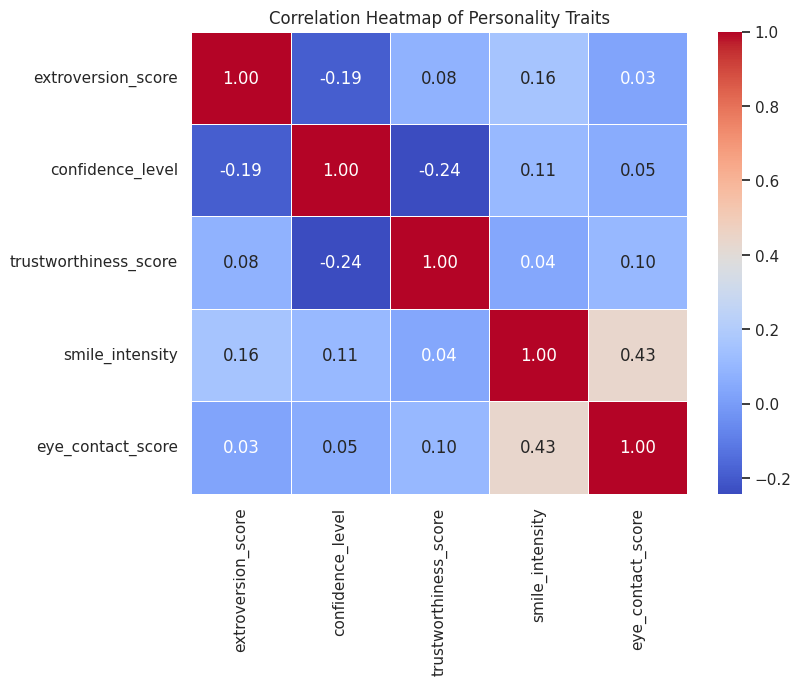

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Δημιουργία Heatmap για τη συσχέτιση
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Personality Traits")
plt.show()


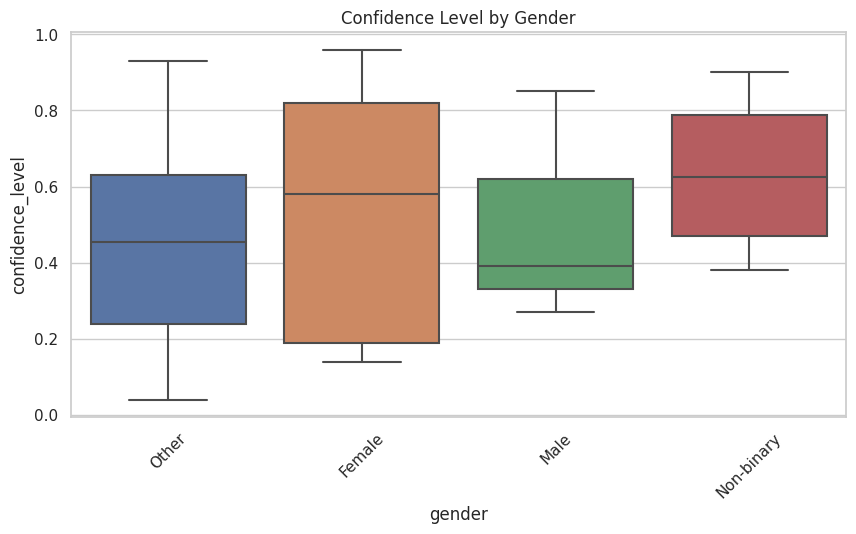

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='confidence_level', data=df)
plt.title('Confidence Level by Gender')
plt.xticks(rotation=45)
plt.show()


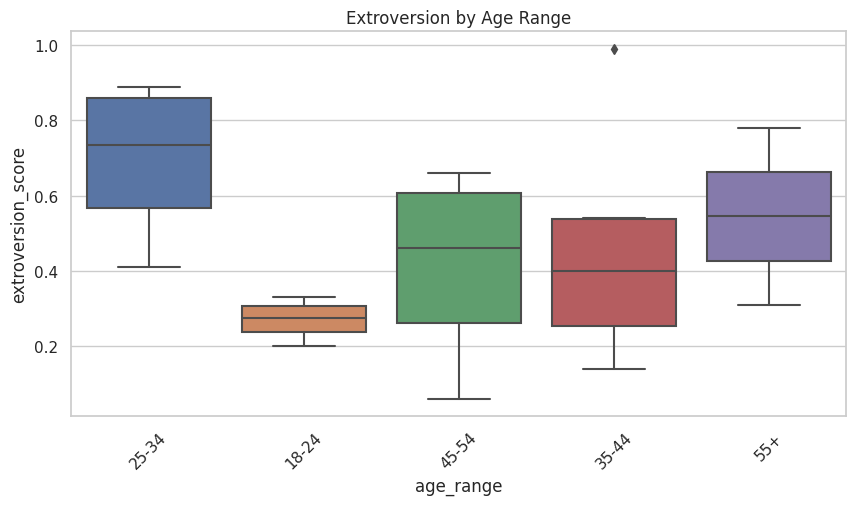

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='age_range', y='extroversion_score', data=df)
plt.title('Extroversion by Age Range')
plt.xticks(rotation=45)
plt.show()


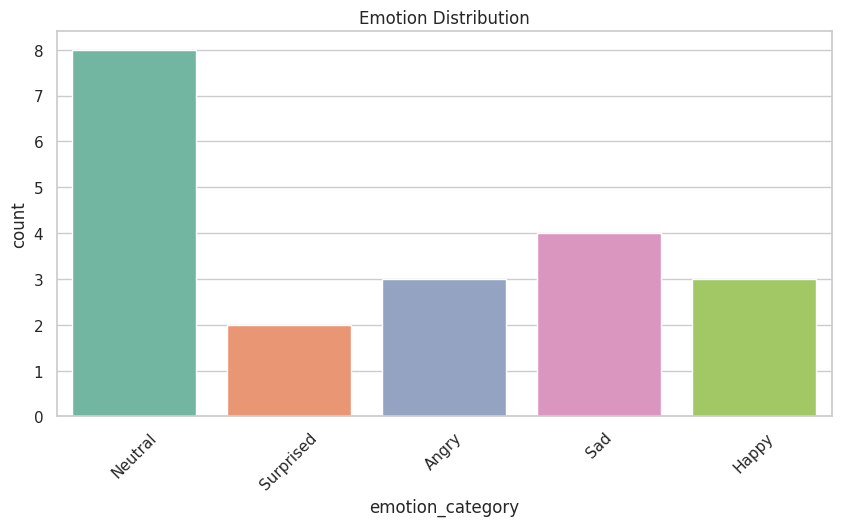

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='emotion_category', data=df, palette='Set2')
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()


2025-07-29 11:46:27.358637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753789587.598399      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753789587.671799      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


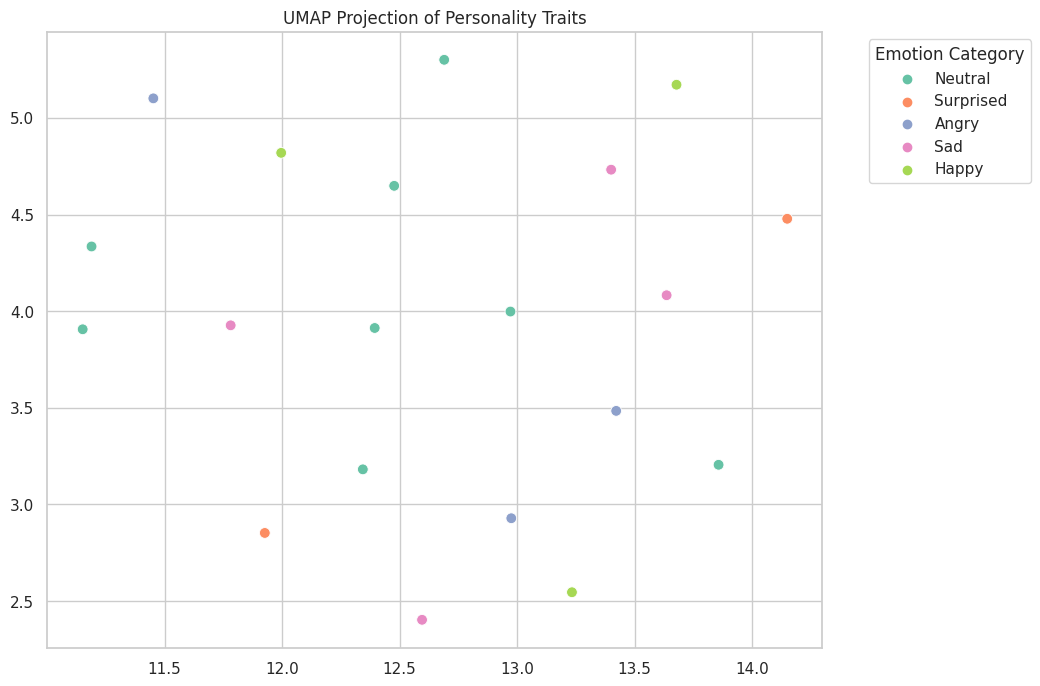

In [31]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Επιλογή μόνο αριθμητικών χαρακτηριστικών
numeric_cols = ['extroversion_score', 'confidence_level', 'trustworthiness_score', 
                'smile_intensity', 'eye_contact_score']

# Εκπαίδευση του UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(df[numeric_cols])

# Οπτικοποίηση με scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=df['emotion_category'], palette='Set2', s=60)
plt.title('UMAP Projection of Personality Traits')
plt.legend(title='Emotion Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


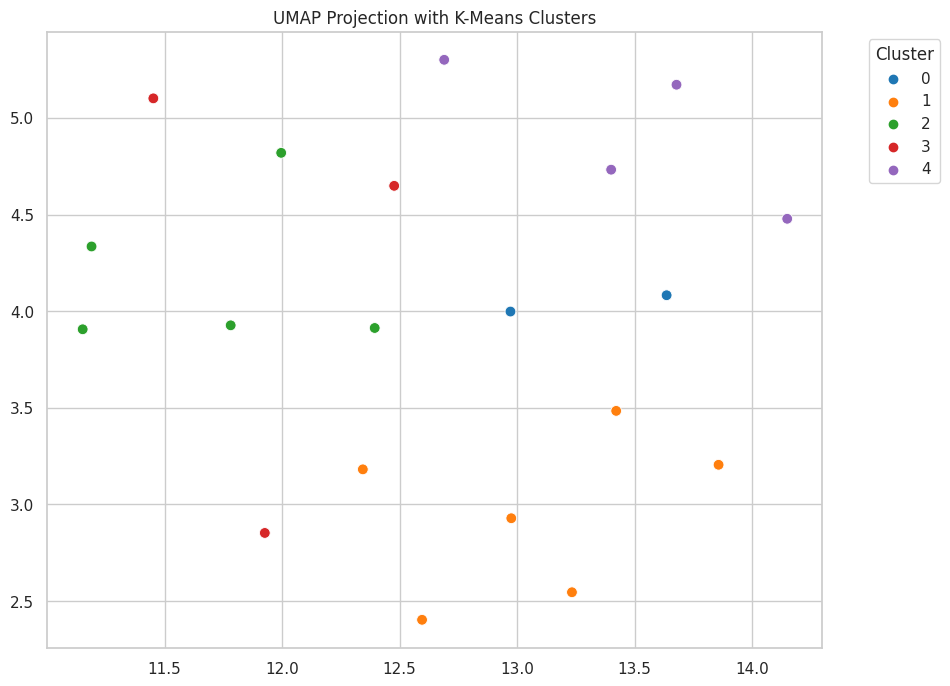

In [32]:
from sklearn.cluster import KMeans

# Αριθμός κλάσεων (clusters)
kmeans = KMeans(n_clusters=5, random_state=42)

# Εκπαίδευση του μοντέλου clustering
df['cluster'] = kmeans.fit_predict(df[numeric_cols])

# Οπτικοποίηση των clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=df['cluster'], palette='tab10', s=60)
plt.title('UMAP Projection with K-Means Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [33]:
# Ομαδοποίηση ανά cluster
cluster_means = df.groupby('cluster')[numeric_cols].mean()

# Εμφάνιση μέσων όρων των χαρακτηριστικών για κάθε cluster
print(cluster_means)


         extroversion_score  confidence_level  trustworthiness_score  \
cluster                                                                
0                  0.920000          0.180000               0.250000   
1                  0.308333          0.833333               0.295000   
2                  0.698000          0.584000               0.824000   
3                  0.313333          0.190000               0.413333   
4                  0.295000          0.372500               0.802500   

         smile_intensity  eye_contact_score  
cluster                                      
0               0.340000           0.130000  
1               0.503333           0.403333  
2               0.694000           0.578000  
3               0.610000           0.740000  
4               0.255000           0.187500  


In [36]:
print(df.columns)


Index(['image_id', 'user_selfie', 'extroversion_score', 'confidence_level',
       'trustworthiness_score', 'smile_intensity', 'eye_contact_score',
       'model_used', 'age_range', 'gender', 'emotion_category', 'cluster'],
      dtype='object')


In [41]:
# Ομαδοποίηση ανά cluster
cluster_means = df.groupby('cluster')[numeric_cols].mean()

# Εμφάνιση μέσων όρων των χαρακτηριστικών για κάθε cluster
print(cluster_means)


         extroversion_score  confidence_level  trustworthiness_score  \
cluster                                                                
0                  0.920000          0.180000               0.250000   
1                  0.308333          0.833333               0.295000   
2                  0.698000          0.584000               0.824000   
3                  0.313333          0.190000               0.413333   
4                  0.295000          0.372500               0.802500   

         smile_intensity  eye_contact_score  
cluster                                      
0               0.340000           0.130000  
1               0.503333           0.403333  
2               0.694000           0.578000  
3               0.610000           0.740000  
4               0.255000           0.187500  


In [43]:
# Ανάλυση των συναισθηματικών κατηγοριών για κάθε cluster
emotion_distribution_per_cluster = df.groupby('cluster')['emotion_category'].value_counts()

print(emotion_distribution_per_cluster)


cluster  emotion_category
0        Neutral             1
         Sad                 1
1        Angry               2
         Neutral             2
         Happy               1
         Sad                 1
2        Neutral             3
         Happy               1
         Sad                 1
3        Angry               1
         Neutral             1
         Surprised           1
4        Happy               1
         Neutral             1
         Sad                 1
         Surprised           1
Name: count, dtype: int64


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Επιλογή χαρακτηριστικών και στόχου
X = df[numeric_cols]
y = df['extroversion_score']

# Διαχωρισμός σε εκπαίδευση και δοκιμή
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Εκπαίδευση του Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Πρόβλεψη και υπολογισμός σφάλματος
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Μέσο Απόλυτο Σφάλμα (MAE): {mae:.4f}")


Μέσο Απόλυτο Σφάλμα (MAE): 0.0265


In [46]:
from sklearn.model_selection import train_test_split

# Επιλογή χαρακτηριστικών και στόχου (target)
X = df[['extroversion_score', 'confidence_level', 'trustworthiness_score', 'smile_intensity', 'eye_contact_score']]  # Χαρακτηριστικά
y = df['extroversion_score']  # Στόχος

# Διαχωρισμός σε εκπαίδευση και δοκιμή (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Δημιουργία του μοντέλου Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Εκπαίδευση του μοντέλου
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [48]:
from sklearn.metrics import mean_absolute_error

# Πρόβλεψη για το σύνολο δοκιμής
y_pred = model.predict(X_test)

# Υπολογισμός του Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.0265


In [49]:
from sklearn.model_selection import GridSearchCV

# Ορισμός των παραμέτρων για το Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Δημιουργία του Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# Εκτέλεση του Grid Search για εύρεση των καλύτερων παραμέτρων
grid_search.fit(X_train, y_train)

# Εμφάνιση των καλύτερων παραμέτρων
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


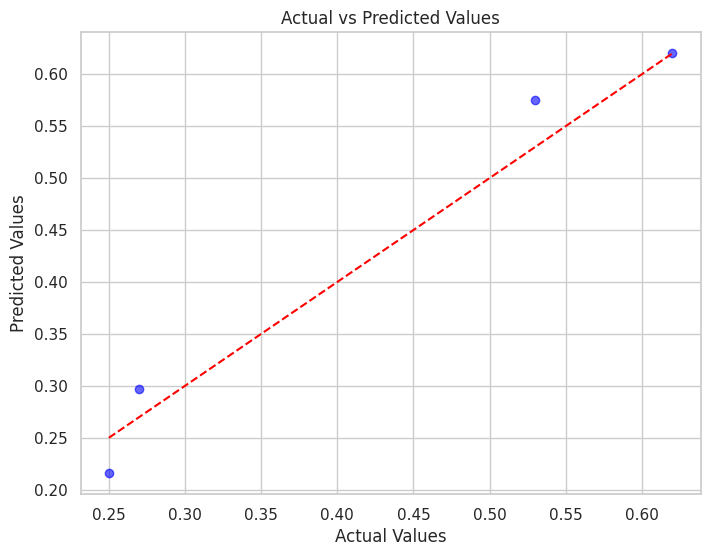

In [50]:
import matplotlib.pyplot as plt

# Δημιουργία scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Διαγώνιος γραμμή
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


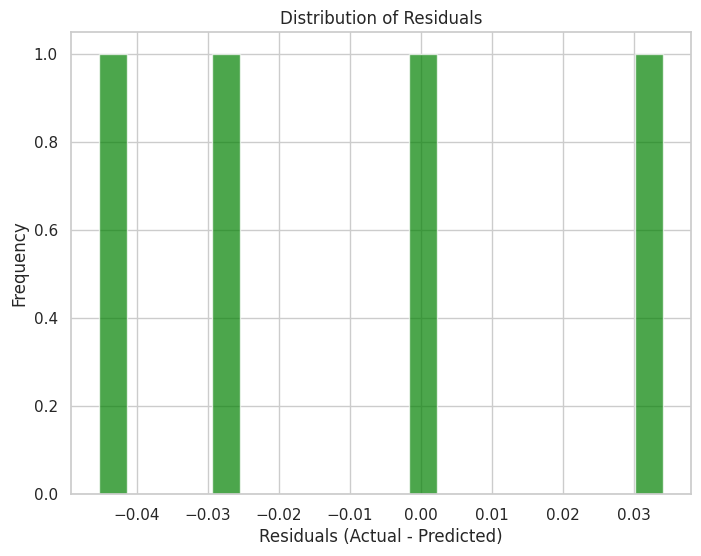

In [51]:
# Υπολογισμός των σφαλμάτων (residuals)
residuals = y_test - y_pred

# Δημιουργία histogram για τα residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


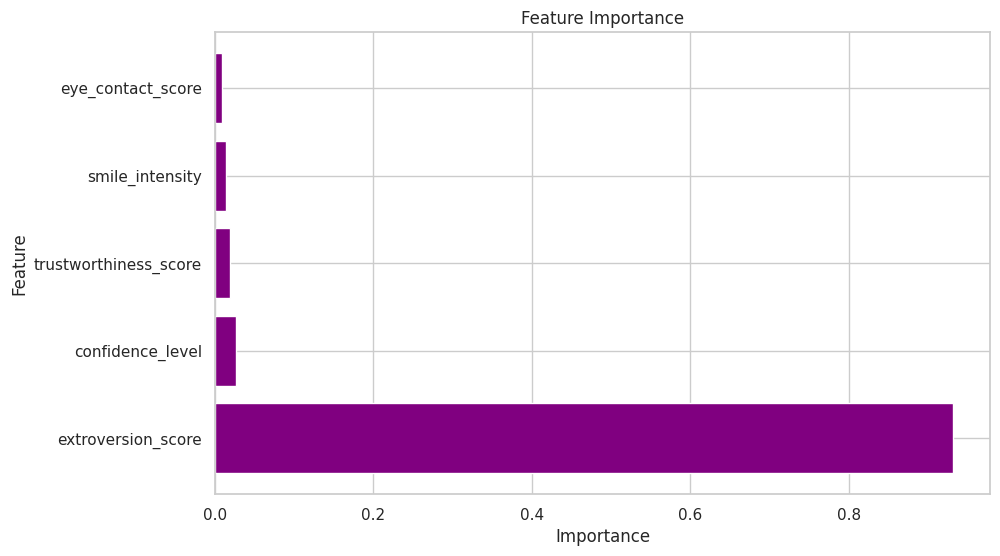

In [52]:
# Εξαγωγή των σημαντικότερων χαρακτηριστικών
importances = model.feature_importances_
features = X.columns

# Δημιουργία DataFrame για την απεικόνιση των σημαντικών χαρακτηριστικών
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Ταξινόμηση κατά φθίνουσα σειρά
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Δημιουργία bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='purple')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [53]:
# Προβλέψεις για νέες εγγραφές (π.χ., νέος χρήστης ή δείγμα)
new_data = pd.DataFrame({
    'extroversion_score': [0.5],
    'confidence_level': [0.6],
    'trustworthiness_score': [0.4],
    'smile_intensity': [0.7],
    'eye_contact_score': [0.5]
})

new_prediction = model.predict(new_data)
print(f"Prediction for new data: {new_prediction[0]}")


Prediction for new data: 0.5578000000000002


In [54]:
from sklearn.model_selection import GridSearchCV

# Ορισμός των παραμέτρων για το Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Δημιουργία του GridSearchCV για RandomForestRegressor
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# Εκπαίδευση με το Grid Search
grid_search.fit(X_train, y_train)

# Εμφάνιση των καλύτερων παραμέτρων
print(f"Best parameters from Grid Search: {grid_search.best_params_}")

# Πρόβλεψη με τα βελτιστοποιημένα υπερπαραμέτρους
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Υπολογισμός του MAE με το βελτιστοποιημένο μοντέλο
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f"Optimized Model Mean Absolute Error (MAE): {mae_best:.4f}")


Best parameters from Grid Search: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Model Mean Absolute Error (MAE): 0.0265


In [55]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Ορισμός των παραμέτρων για το Randomized Search
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Δημιουργία του RandomizedSearchCV για RandomForestRegressor
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_dist, n_iter=50, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=42)

# Εκπαίδευση με το Randomized Search
random_search.fit(X_train, y_train)

# Εμφάνιση των καλύτερων παραμέτρων
print(f"Best parameters from Randomized Search: {random_search.best_params_}")

# Πρόβλεψη με τα βελτιστοποιημένα υπερπαραμέτρους
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test)

# Υπολογισμός του MAE με το βελτιστοποιημένο μοντέλο
mae_random = mean_absolute_error(y_test, y_pred_random)
print(f"Optimized Model Mean Absolute Error (MAE): {mae_random:.4f}")


Best parameters from Randomized Search: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Optimized Model Mean Absolute Error (MAE): 0.0265


In [56]:
# Εκπαίδευση με όλα τα δεδομένα (X, y)
final_model = best_model_random  # ή best_model από Grid Search
final_model.fit(X, y)

# Αποθήκευση του τελικού μοντέλου (αν το χρειαστείτε για εφαρμογή σε πραγματικό σύστημα)
import joblib
joblib.dump(final_model, 'final_model.pkl')


['final_model.pkl']

In [57]:
from flask import Flask, request, jsonify
import joblib

# Φόρτωση του μοντέλου
model = joblib.load('final_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = model.predict([data['features']])
    return jsonify(prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 666, in initialize
    sel

SystemExit: 1

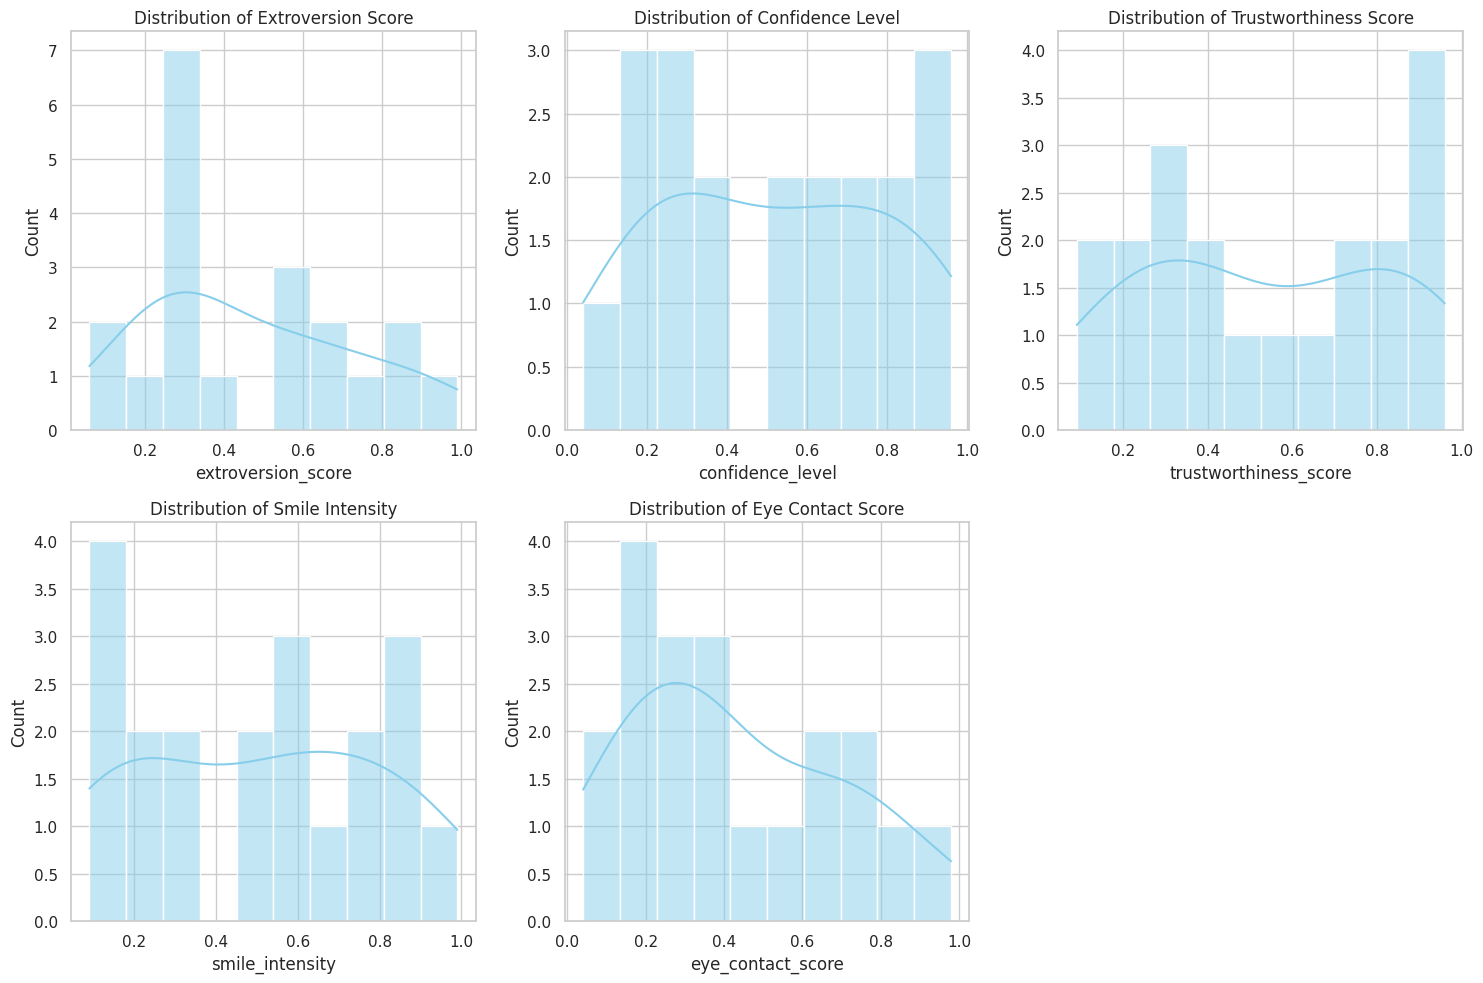

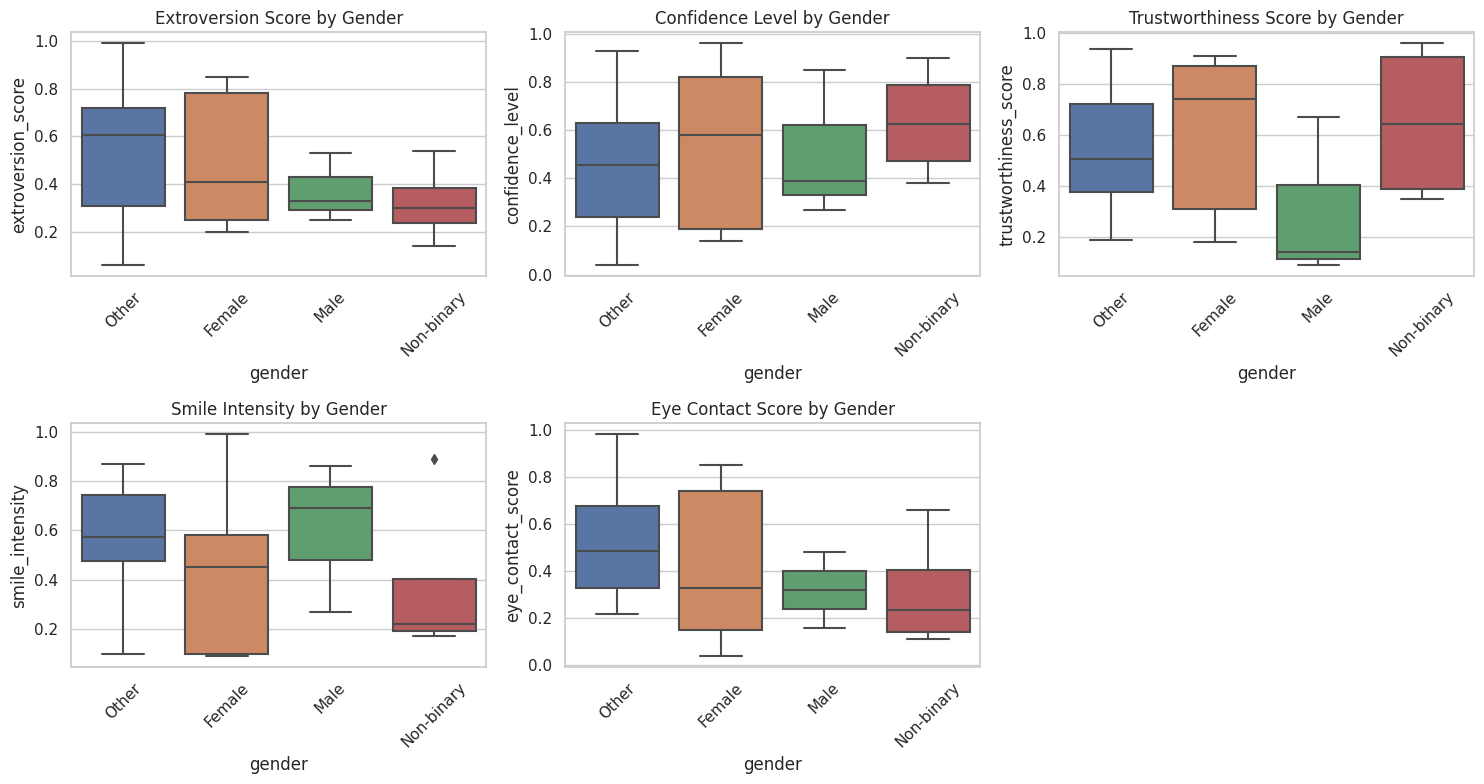

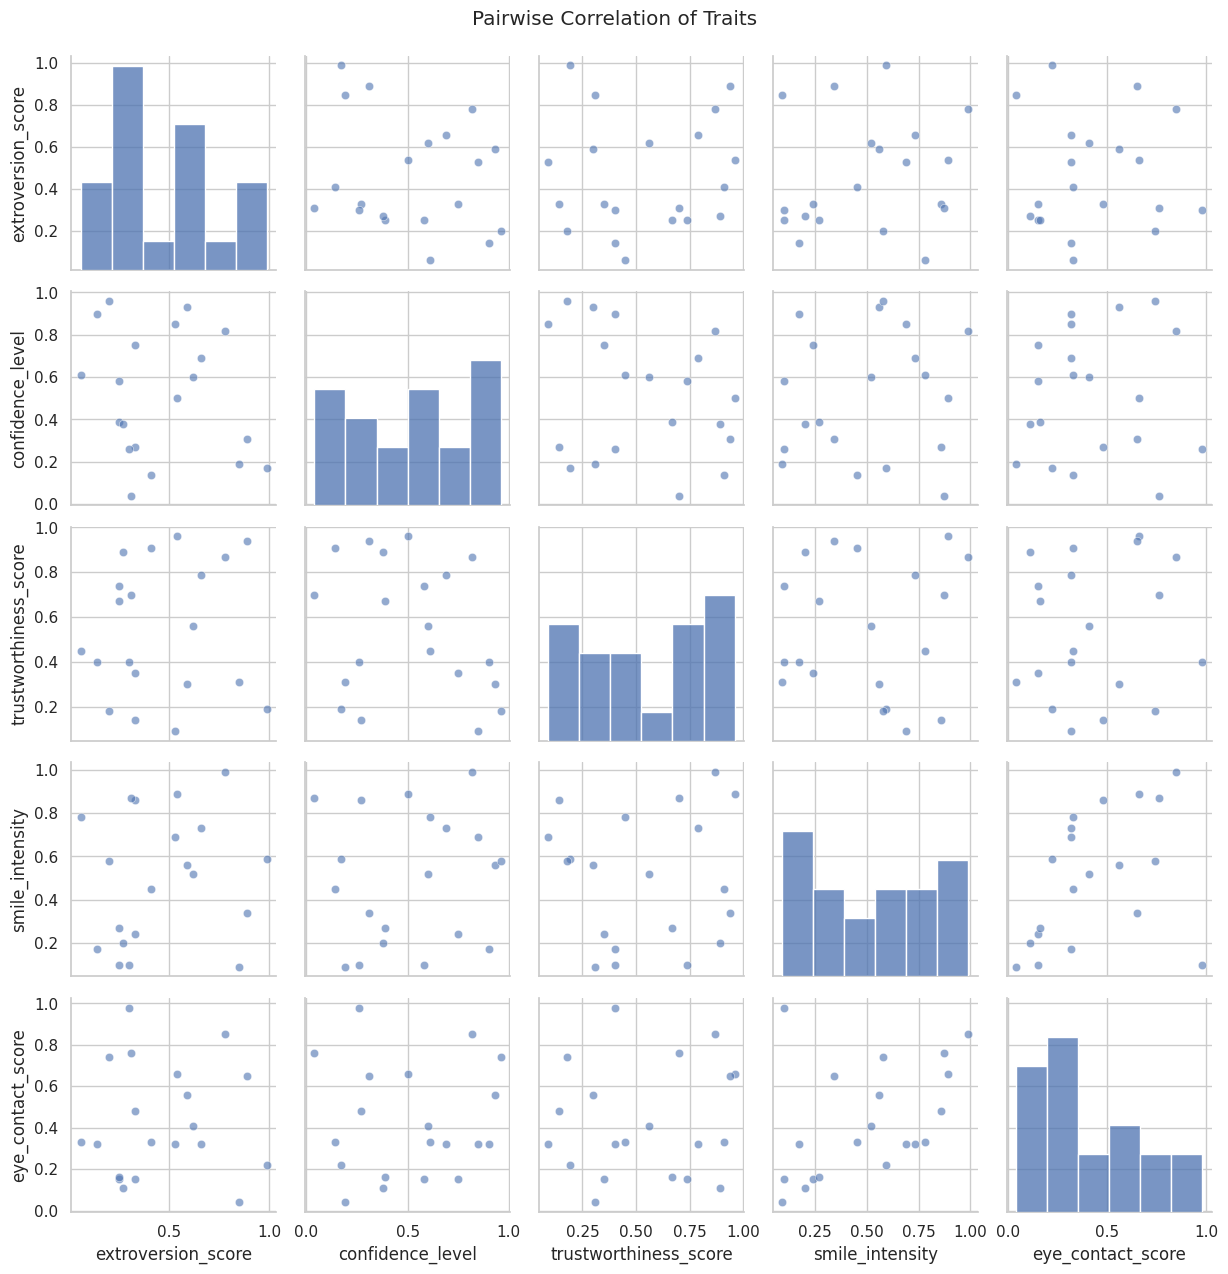

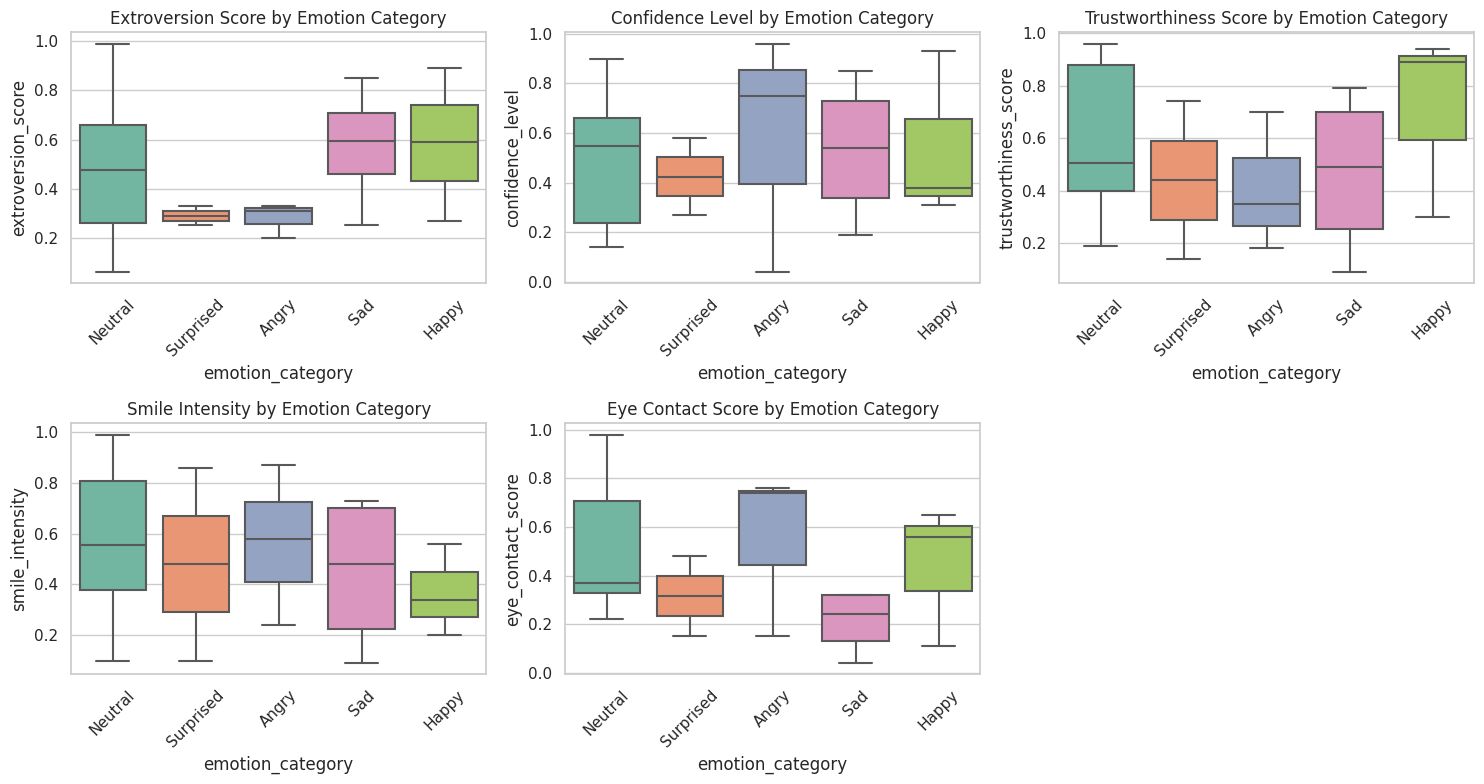

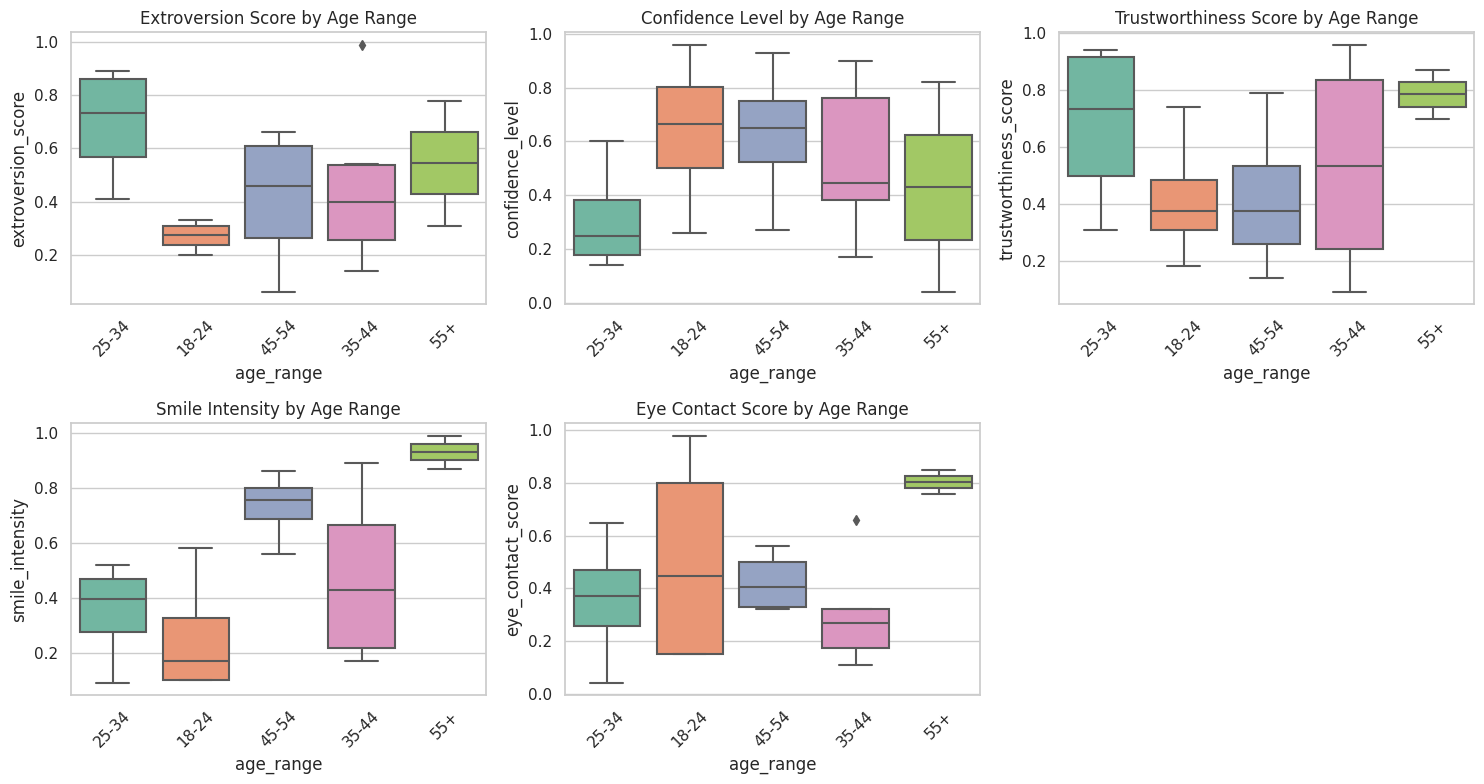

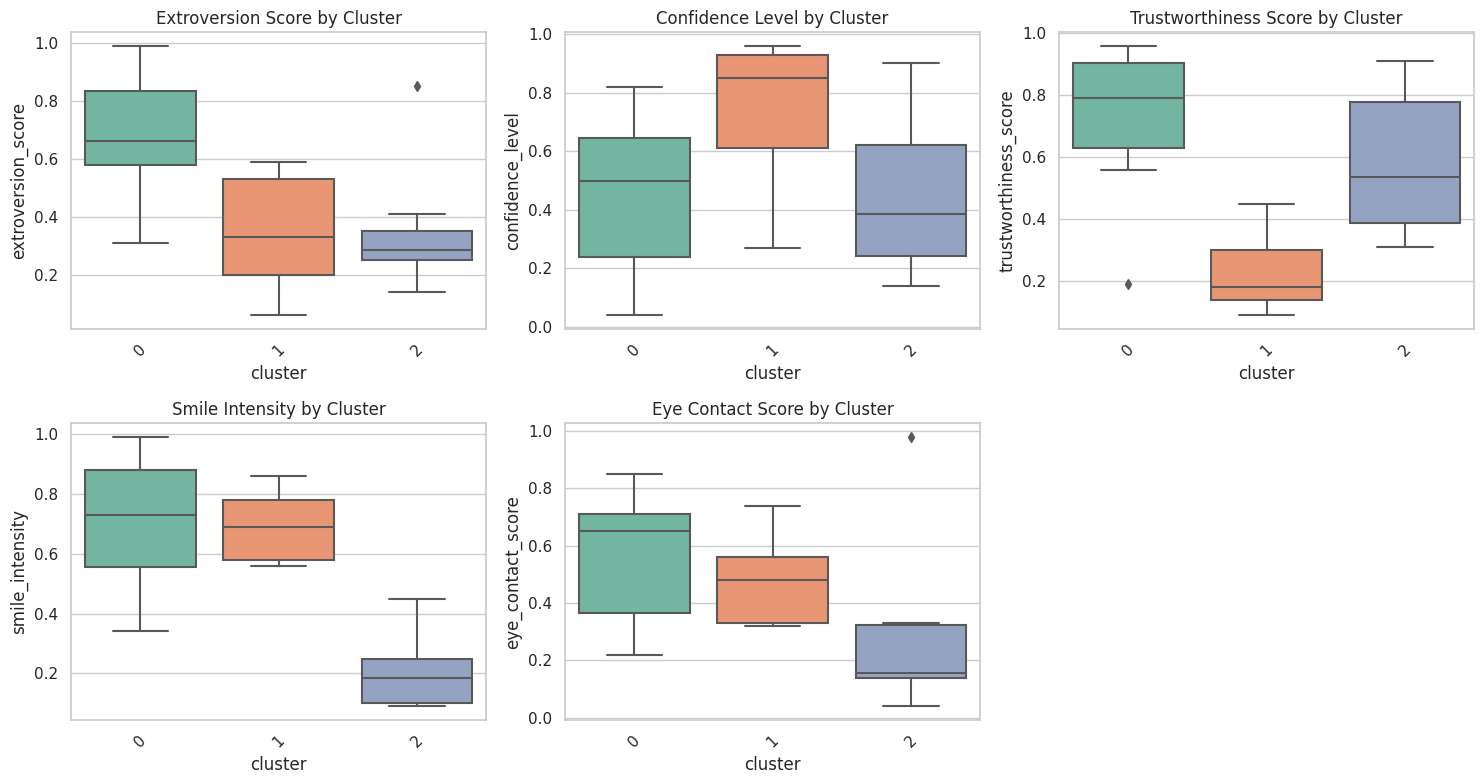

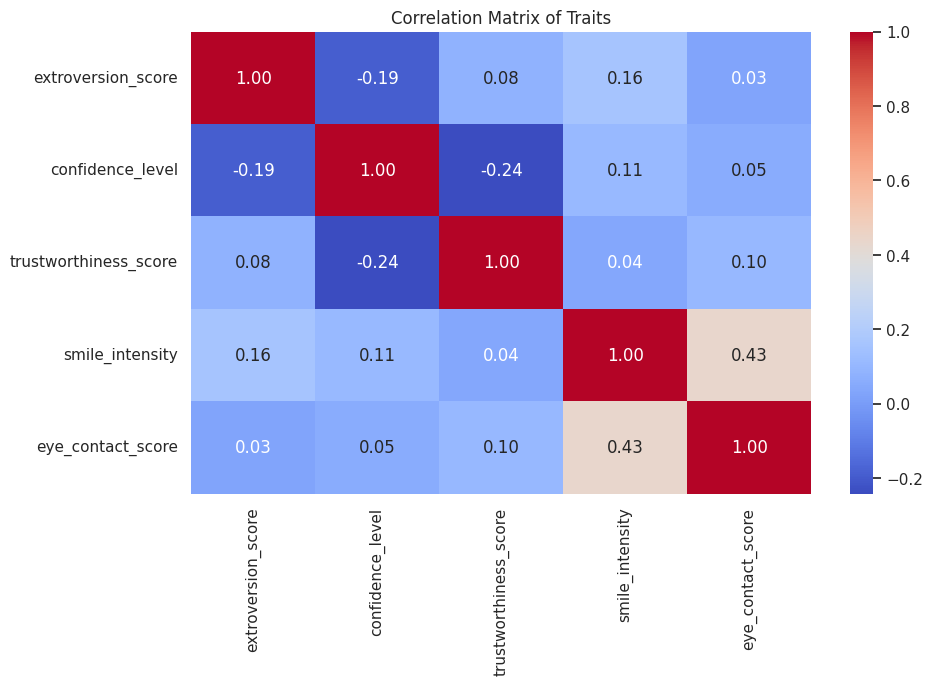

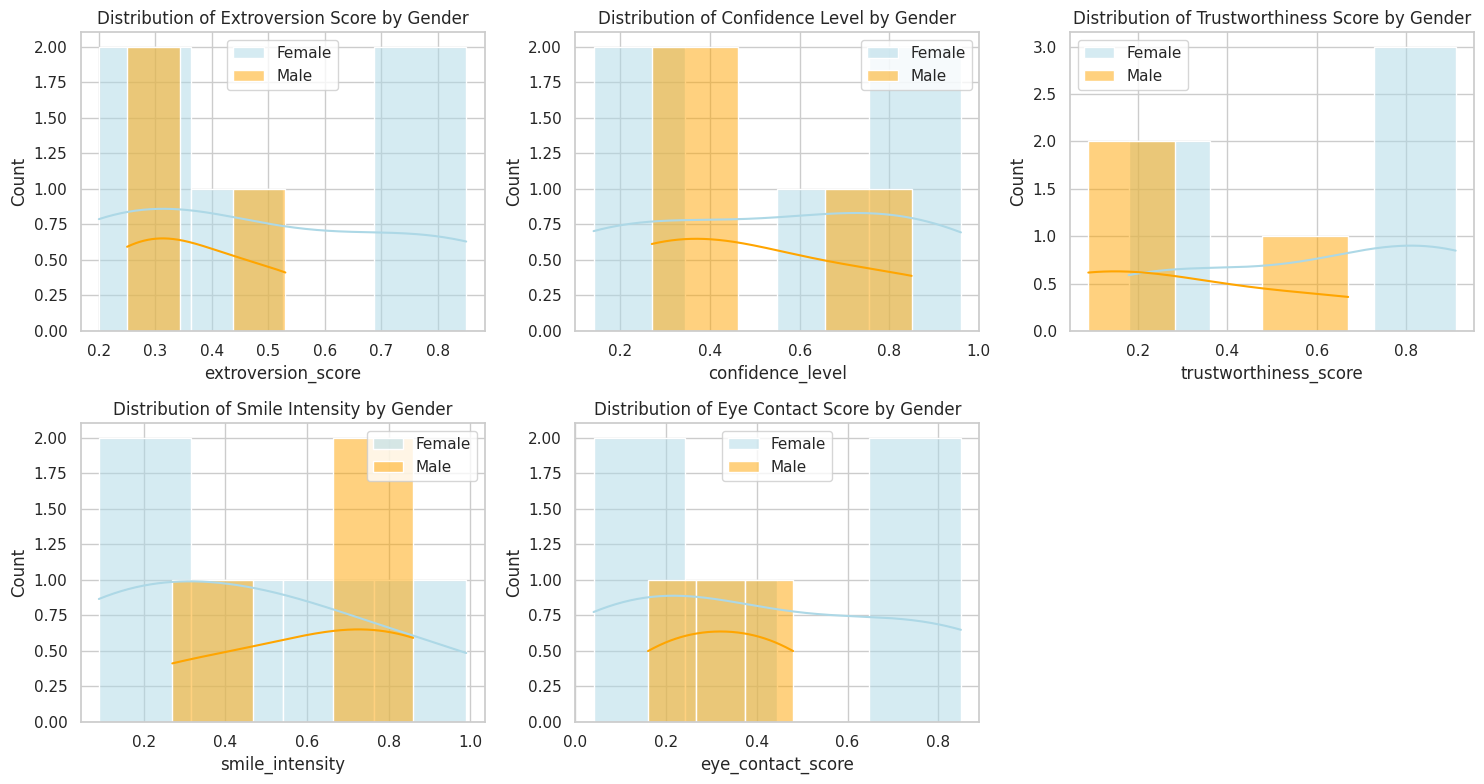

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Φόρτωση του dataset
df = pd.read_csv("/kaggle/input/ai-thinks-personality-traits-from-selfies/ai_personality_selfie_dataset.csv")

# Ορισμός του στυλ των γραφημάτων
sns.set(style="whitegrid")

# Προετοιμασία των χαρακτηριστικών που θέλουμε να αναλύσουμε
traits = [
    "extroversion_score",
    "confidence_level",
    "trustworthiness_score",
    "smile_intensity",
    "eye_contact_score"
]

# 1. Κατανομή κάθε χαρακτηριστικού
plt.figure(figsize=(15, 10))
for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[trait], bins=10, kde=True, color="skyblue")
    plt.title(f"Distribution of {trait.replace('_', ' ').title()}")

plt.tight_layout()
plt.show()

# 2. Boxplot των χαρακτηριστικών ανά φύλο
plt.figure(figsize=(15, 8))
for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="gender", y=trait, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{trait.replace('_', ' ').title()} by Gender")

plt.tight_layout()
plt.show()

# 3. Pairplot των χαρακτηριστικών για να δούμε τη συσχέτιση
sns.pairplot(df[traits], kind="scatter", plot_kws={"alpha": 0.6})
plt.suptitle("Pairwise Correlation of Traits", y=1.02)
plt.show()

# 4. Boxplot των χαρακτηριστικών ανά κατηγορία συναισθήματος
plt.figure(figsize=(15, 8))
for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="emotion_category", y=trait, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"{trait.replace('_', ' ').title()} by Emotion Category")

plt.tight_layout()
plt.show()

# 5. Boxplot των χαρακτηριστικών ανά ηλικιακή ομάδα
plt.figure(figsize=(15, 8))
for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="age_range", y=trait, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"{trait.replace('_', ' ').title()} by Age Range")

plt.tight_layout()
plt.show()

# 6. Υπολογισμός του κλάστερ KMeans για τα χαρακτηριστικά
# Αφαιρούμε τη στήλη 'image_id' και 'user_selfie' για να κάνουμε clustering
features = df[traits].values
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# 7. Ανάλυση της κατανομής των χαρακτηριστικών ανά κλάστερ
plt.figure(figsize=(15, 8))
for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="cluster", y=trait, data=df, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"{trait.replace('_', ' ').title()} by Cluster")

plt.tight_layout()
plt.show()

# 8. Heatmap για τις συσχετίσεις των χαρακτηριστικών
correlation_matrix = df[traits].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Traits")
plt.show()

# 9. Κατανομή των χαρακτηριστικών σε σχέση με την ηλικία ή το φύλο
# Στη περίπτωση αυτή, μπορούμε να δημιουργήσουμε γραφήματα για να παρατηρήσουμε πώς επηρεάζει το φύλο ή η ηλικία τα χαρακτηριστικά
plt.figure(figsize=(15, 8))
for i, trait in enumerate(traits, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[df['gender'] == 'Female'][trait], kde=True, color='lightblue', label='Female')
    sns.histplot(df[df['gender'] == 'Male'][trait], kde=True, color='orange', label='Male')
    plt.legend()
    plt.title(f"Distribution of {trait.replace('_', ' ').title()} by Gender")

plt.tight_layout()
plt.show()
